<a href="https://colab.research.google.com/github/zaegeon/Python/blob/main/20220607_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercises

*  https://github.com/JakeOh/202205_itw_bd34/raw/main/datasets/banklist.csv 파일을 읽고 데이터 프레임 생성
*  날짜시간(datetime) 타입으로 변환할 수 있는 모든 컬럼들을의 데이터 타입을 변환.
*  연도별 파산한 은행 숫자를 찾고, 시각화
*  분기별 파산한 은행 숫자를 찾고, 시각화
    *  주기별 통계는 Closing Date를 기준으로.

# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
banklist_csv = 'https://github.com/JakeOh/202205_itw_bd34/raw/main/datasets/banklist.csv'
banklist = pd.read_csv(banklist_csv, parse_dates=['Closing Date', 'Updated Date'])
banklist

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-15,2017-12-20
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-13,2017-10-20
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2017-07-26
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2017-07-26
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2017-12-05
...,...,...,...,...,...,...,...
550,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB",2001-07-27,2014-08-19
551,Malta National Bank,Malta,OH,6629,North Valley Bank,2001-05-03,2002-11-18
552,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,2001-02-02,2003-02-18
553,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,2000-12-14,2005-03-17


In [ ]:
banklist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null    object        
 3   CERT                   555 non-null    int64         
 4   Acquiring Institution  555 non-null    object        
 5   Closing Date           555 non-null    datetime64[ns]
 6   Updated Date           555 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.5+ KB


In [ ]:
# 'Closing Date' 컬럼을 인덱스로 변환
banklist_with_index = banklist.set_index('Closing Date')
banklist_with_index

,Bank Name,City,ST,CERT,Acquiring Institution,Updated Date
Closing Date,,,,,,
2017-12-15,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-20
2017-10-13,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-20
2017-05-26,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-07-26
2017-05-05,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-07-26
2017-04-28,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-12-05
...,...,...,...,...,...,...
2001-07-27,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB",2014-08-19
2001-05-03,Malta National Bank,Malta,OH,6629,North Valley Bank,2002-11-18
2001-02-02,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,2003-02-18


In [ ]:
# 연도별 파산한 은행 수
bankrupt_year = banklist_with_index.resample('Y')['Bank Name'].count()
bankrupt_year

Closing Date
2000-12-31      2
2001-12-31      4
2002-12-31     11
2003-12-31      3
2004-12-31      4
2005-12-31      0
2006-12-31      0
2007-12-31      3
2008-12-31     25
2009-12-31    140
2010-12-31    157
2011-12-31     92
2012-12-31     51
2013-12-31     24
2014-12-31     18
2015-12-31      8
2016-12-31      5
2017-12-31      8
Freq: A-DEC, Name: Bank Name, dtype: int64

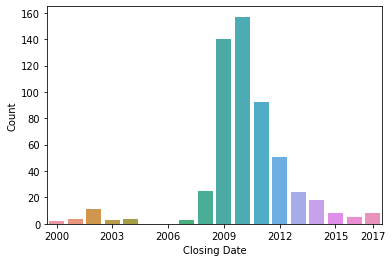

In [ ]:
sns.barplot(x=bankrupt_year.index, y=bankrupt_year)
plt.ylabel('Count')
plt.xticks([0, 3, 6, 9, 12, 15, 17], labels=['2000', '2003', '2006', '2009', '2012', '2015', '2017'])
plt.show()

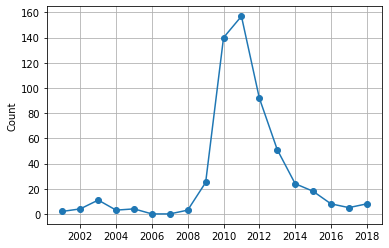

In [ ]:
plt.plot(bankrupt_year, marker='o')
plt.ylabel('Count')
plt.grid()
plt.show()

In [ ]:
# 분기별 파산한 은행 수
bankrupt_quarter = banklist_with_index.resample('Q')['Bank Name'].count()
bankrupt_quarter

Closing Date
2000-12-31    2
2001-03-31    1
2001-06-30    1
2001-09-30    2
2001-12-31    0
             ..
2016-12-31    0
2017-03-31    3
2017-06-30    3
2017-09-30    0
2017-12-31    2
Freq: Q-DEC, Name: Bank Name, Length: 69, dtype: int64

In [ ]:
len(bankrupt_quarter)

69

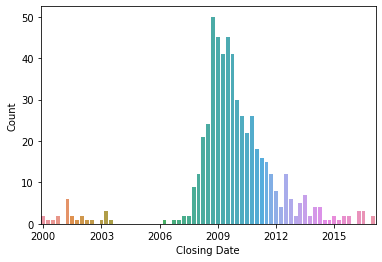

In [ ]:
sns.barplot(x=bankrupt_quarter.index, y=bankrupt_quarter)
plt.ylabel('Count')
plt.xticks(np.arange(0, 69, 12), labels=np.arange(2000, 2018, 3))
plt.show()

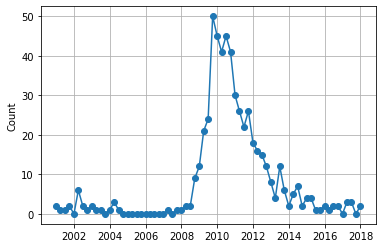

In [ ]:
plt.plot(bankrupt_quarter, marker='o')
plt.ylabel('Count')
plt.grid()
plt.show()